# NLP Project

# Business Use-Case
**Improve Movie Audience Satisfaction and Box Office Performance through Sentiment Analysis of IMDB Reviews.**


### Objective: 
Use sentiment analysis on IMDB movie reviews to understand audience sentiments and identify factors influencing positive and negative opinions. This analysis will enable movie studios to make data-driven decisions, enhancing audience satisfaction, and maximizing box office performance.

# Importing Libraries

In [4]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
# nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Reading the Data 

In [5]:
df = pd.read_csv('Review.csv')
# Check first five rows of the data
df.head()

,sentiment,review
0,Negative,I had no background knowledge of this movie be...
1,Negative,I am a huge Jane Austen fan and I ordered the ...
2,Negative,Nothing to say but Wow! Has anyone actually ha...
3,Negative,i like Jane Austin novels. I love Pride and Pr...
4,Negative,In this day and age of incredible special movi...


In [6]:
df.tail()

,sentiment,review
9995,Positive,I first saw this movie back in the early'90's ...
9996,Positive,"NYC, 2022: The Greenhouse effect, vanished oce..."
9997,Positive,"Those individuals familiar with Asian cinema, ..."
9998,Positive,"The kids, aged 7 to 14, got such a huge kick o..."
9999,Positive,I so love this movie! The animation is great (...


## Understanding theData

In [7]:
# check the dimensions of the data 
df.shape

(10000, 2)

In [8]:
# check the data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10000 non-null  object
 1   review     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [9]:
# statistical summary of the data 
df.describe()

,sentiment,review
count,10000,10000
unique,2,9990
top,Negative,This show comes up with interesting locations ...
freq,5081,3


In [10]:
# check nulls
df.isna().sum()

sentiment    0
review       0
dtype: int64

In [11]:
# drop duplicate rows from the data 
df.drop_duplicates(inplace=True)
df.shape

(9990, 2)

In [12]:
# Count the number of positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

Negative    5073
Positive    4917
Name: sentiment, dtype: int64

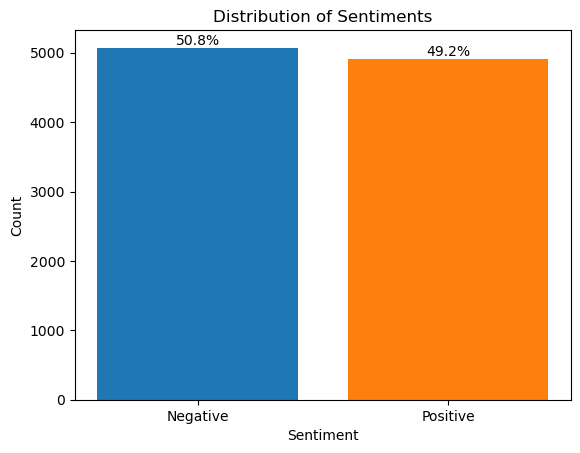

In [13]:
# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=('tab:blue','tab:orange'))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Add percentages on top of each bar
total = sum(sentiment_counts.values)
for i, count in enumerate(sentiment_counts.values):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

**Inference**

- The distribution of sentiments in our data is almost equally distributed. 

- Therefore, we can say that we have a balanced data 

## Text preprocessing

In [14]:
# Remove all the special characters
stop_words = set(stopwords.words('english'))
# Define a function to clean the text using regular expressions
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    return text

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
# Clean the 'review' column and apply the clean text function here
df['review'] = df['review'].apply(clean_text)
df['review'].head() 

0    background knowledge movie bought sounded cool...
1    huge jane austen fan ordered movie amazonuk co...
2    nothing say wow anyone actually somebody sneak...
3    like jane austin novels love pride prejudice s...
4    day age incredible special movie effects one s...
Name: review, dtype: object

In [17]:
df['review'][0]

'background knowledge movie bought sounded cool ive wanting see really kickbutt viking movie awhile alas film looking hoped best instead delivered boring nordic soapopera seemed drag long despite 84 minute running time films premise intriguing enough viking warlord defies god odin enraged curses warlords son named barek death rebirth berserker barek guy forced live enraged insane violent lifetime lifetime movie filmed competently enough rich cinematography quasigood performances actors found bored questioning dribble would end filmmakers chance make something rather entertaining semiunique dropped ball perhaps couldve improved cheap exploitation tactics thrown gratuitous nudity lots gore mean talking berserkers arent vikings supposed bad enough raping pillaging arent berserkers supposed even extreme unless youre fan young restless etc fact insane berserker likes self torture id probably steer clear drab piece celluloid'

## WordCloud

### WordCloud for whole data 

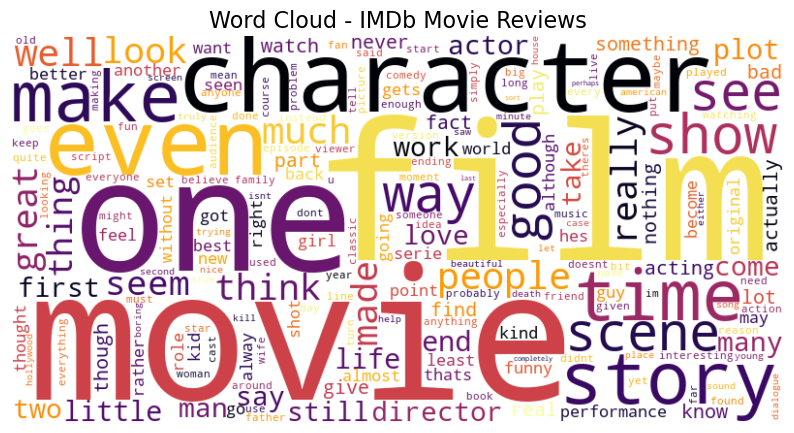

In [14]:
all_reviews = ' '.join(df['review'])

# Create a WordCloud object and generate the word cloud with a custom color map
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - IMDb Movie Reviews', fontsize=16)
plt.show()

In [15]:
df.sentiment = df.sentiment.astype('object')

In [16]:
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "Positive" else 0 for each in df.sentiment]

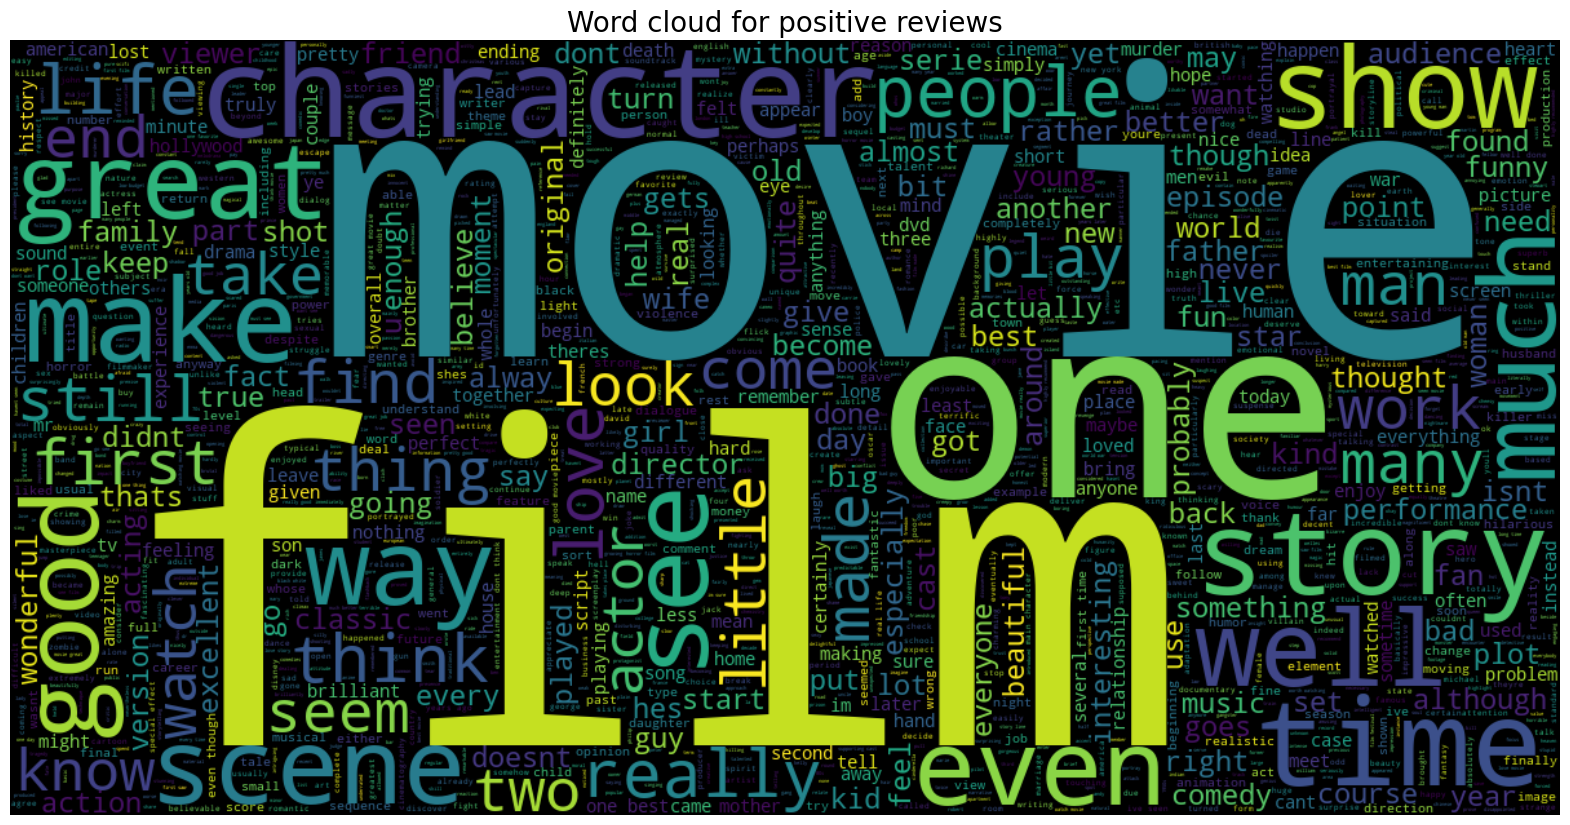

In [17]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

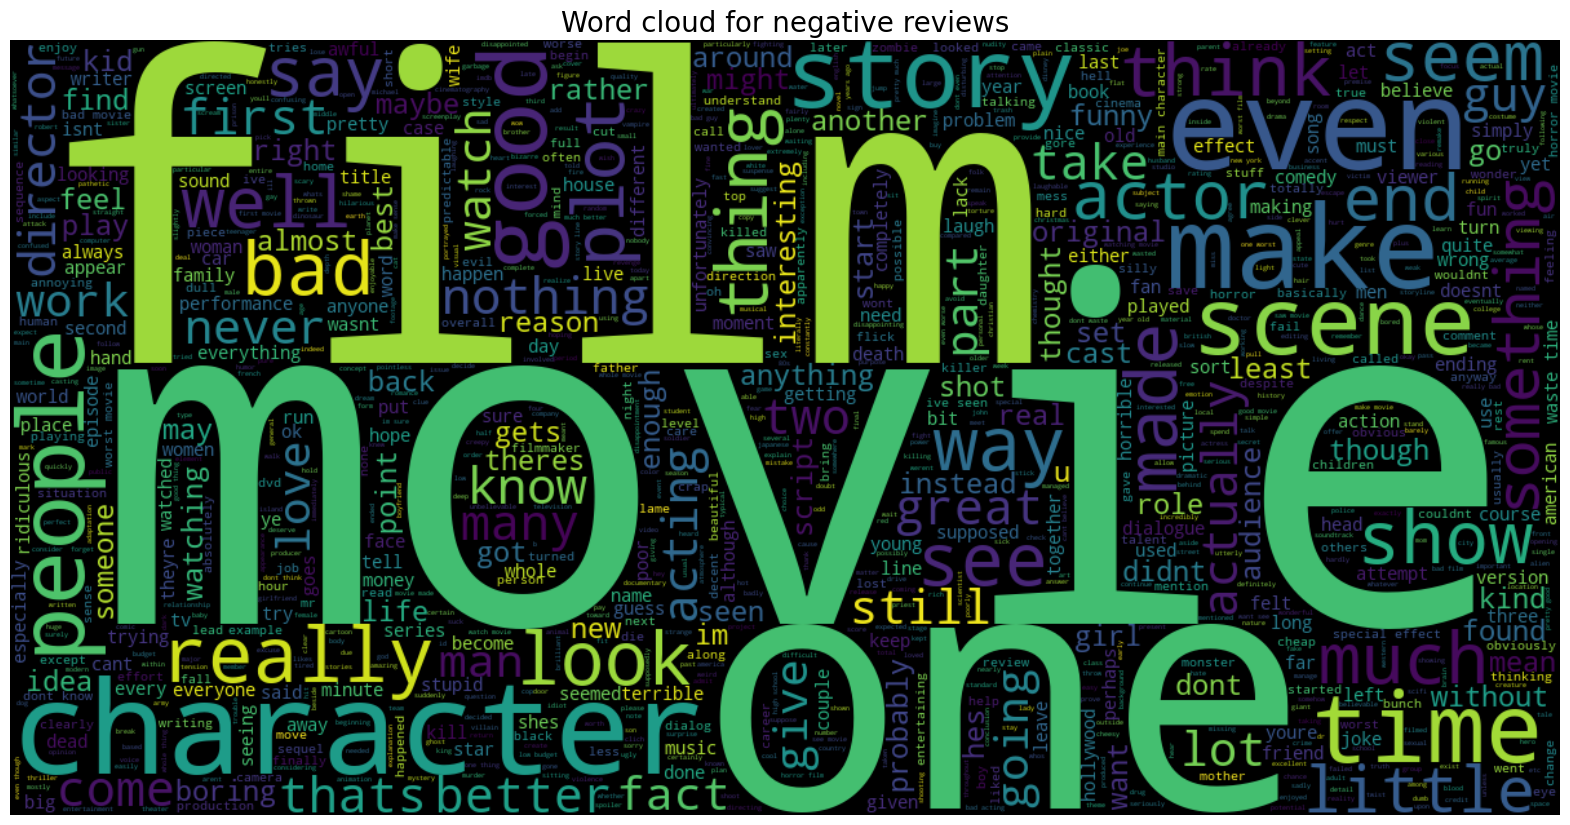

In [18]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

### Removing white spaces 

In [19]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['background', 'knowledge', 'movie', 'bought', 'sounded']

**Note :** These are the first five words of the first review

### N_gram plots ( most frequent n words)

This function will give you the plots of n cosecutive most frequent words used together in a sequence 

In [11]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

### Unigram analysis (most frequent one word)

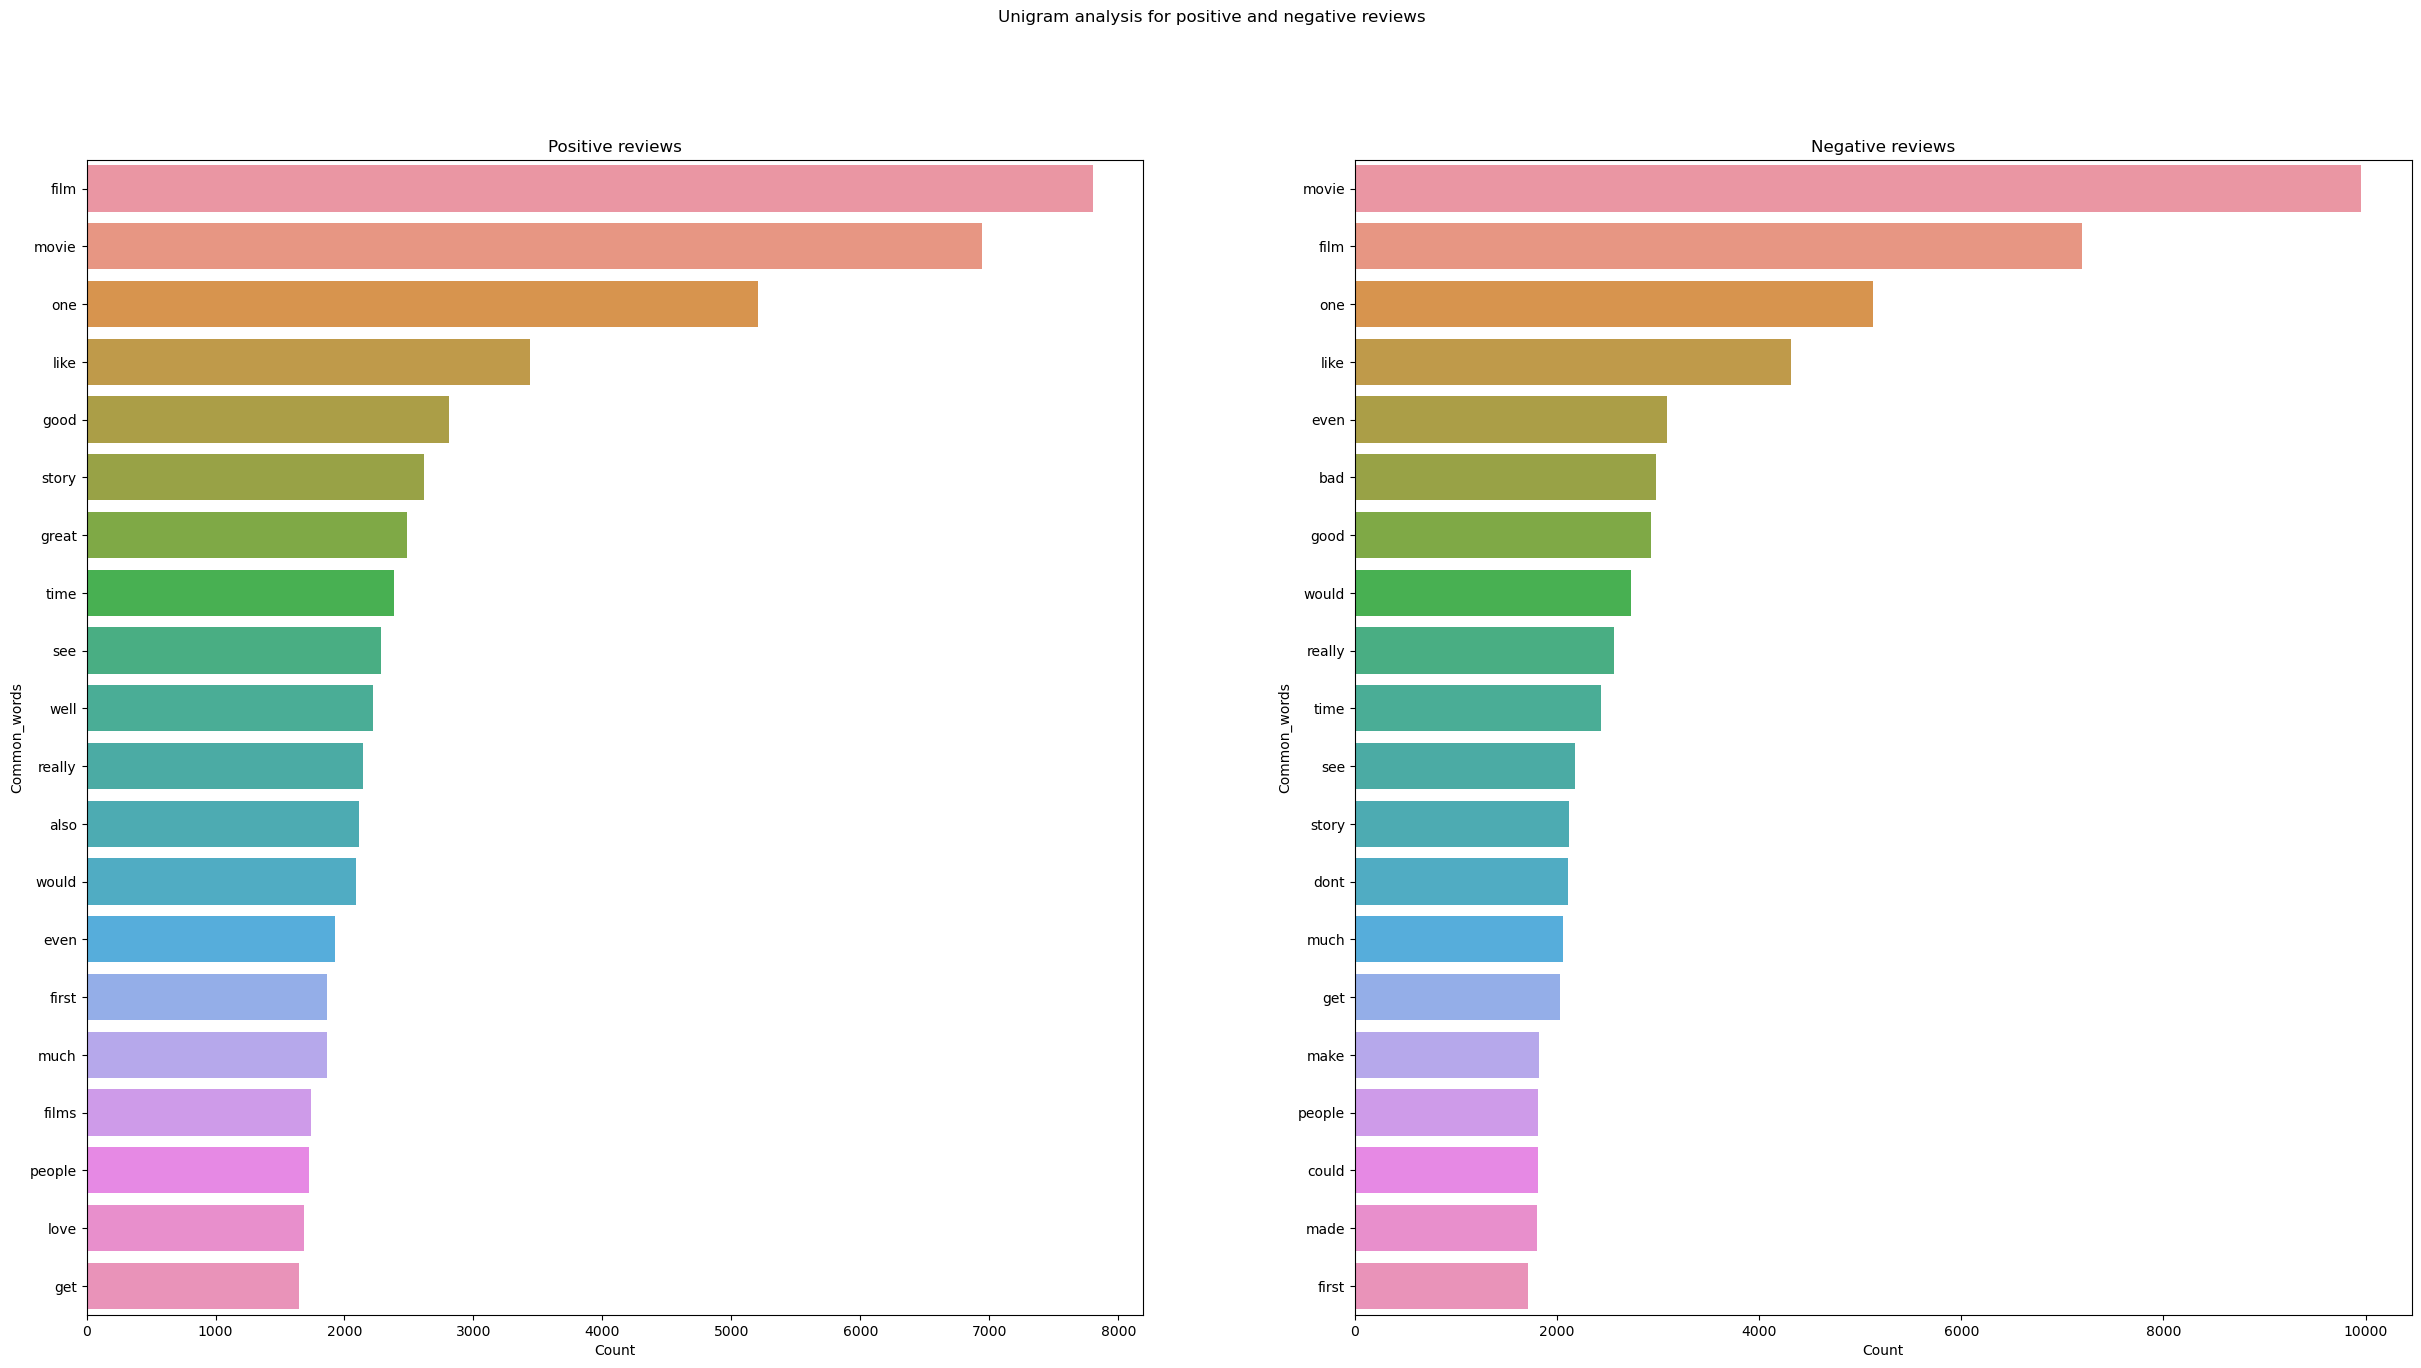

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()


### Bigram analysis (most frequent two words)

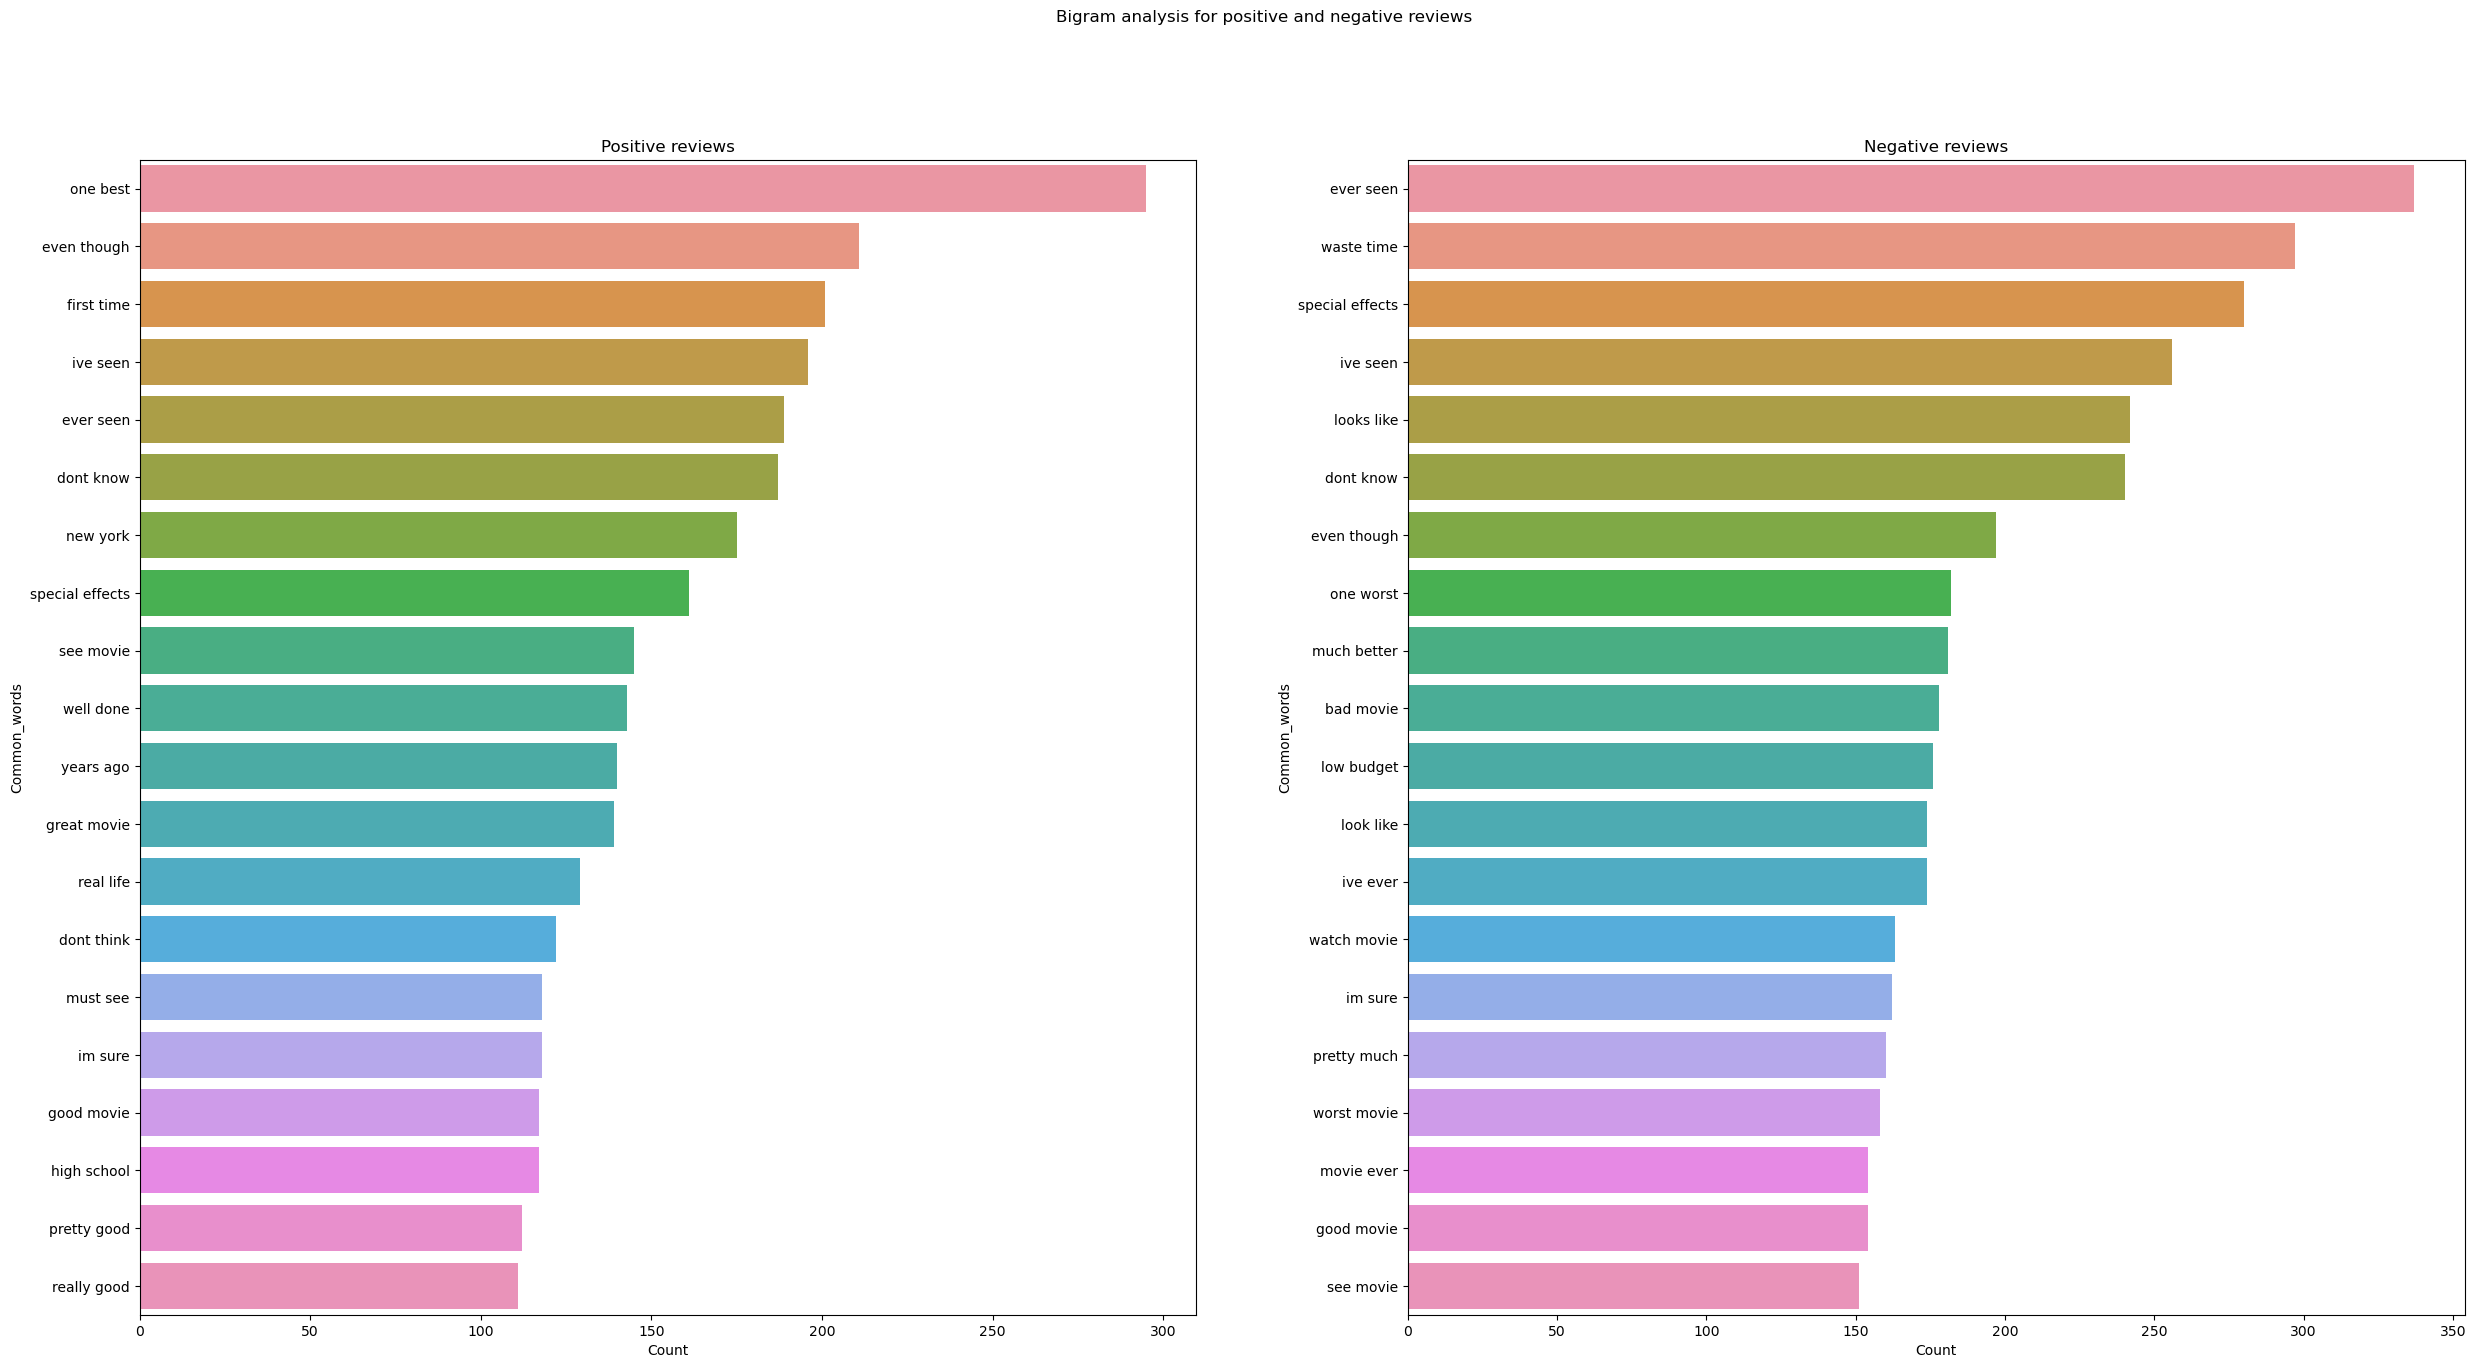

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

### trigram analysis (most frequent three word)

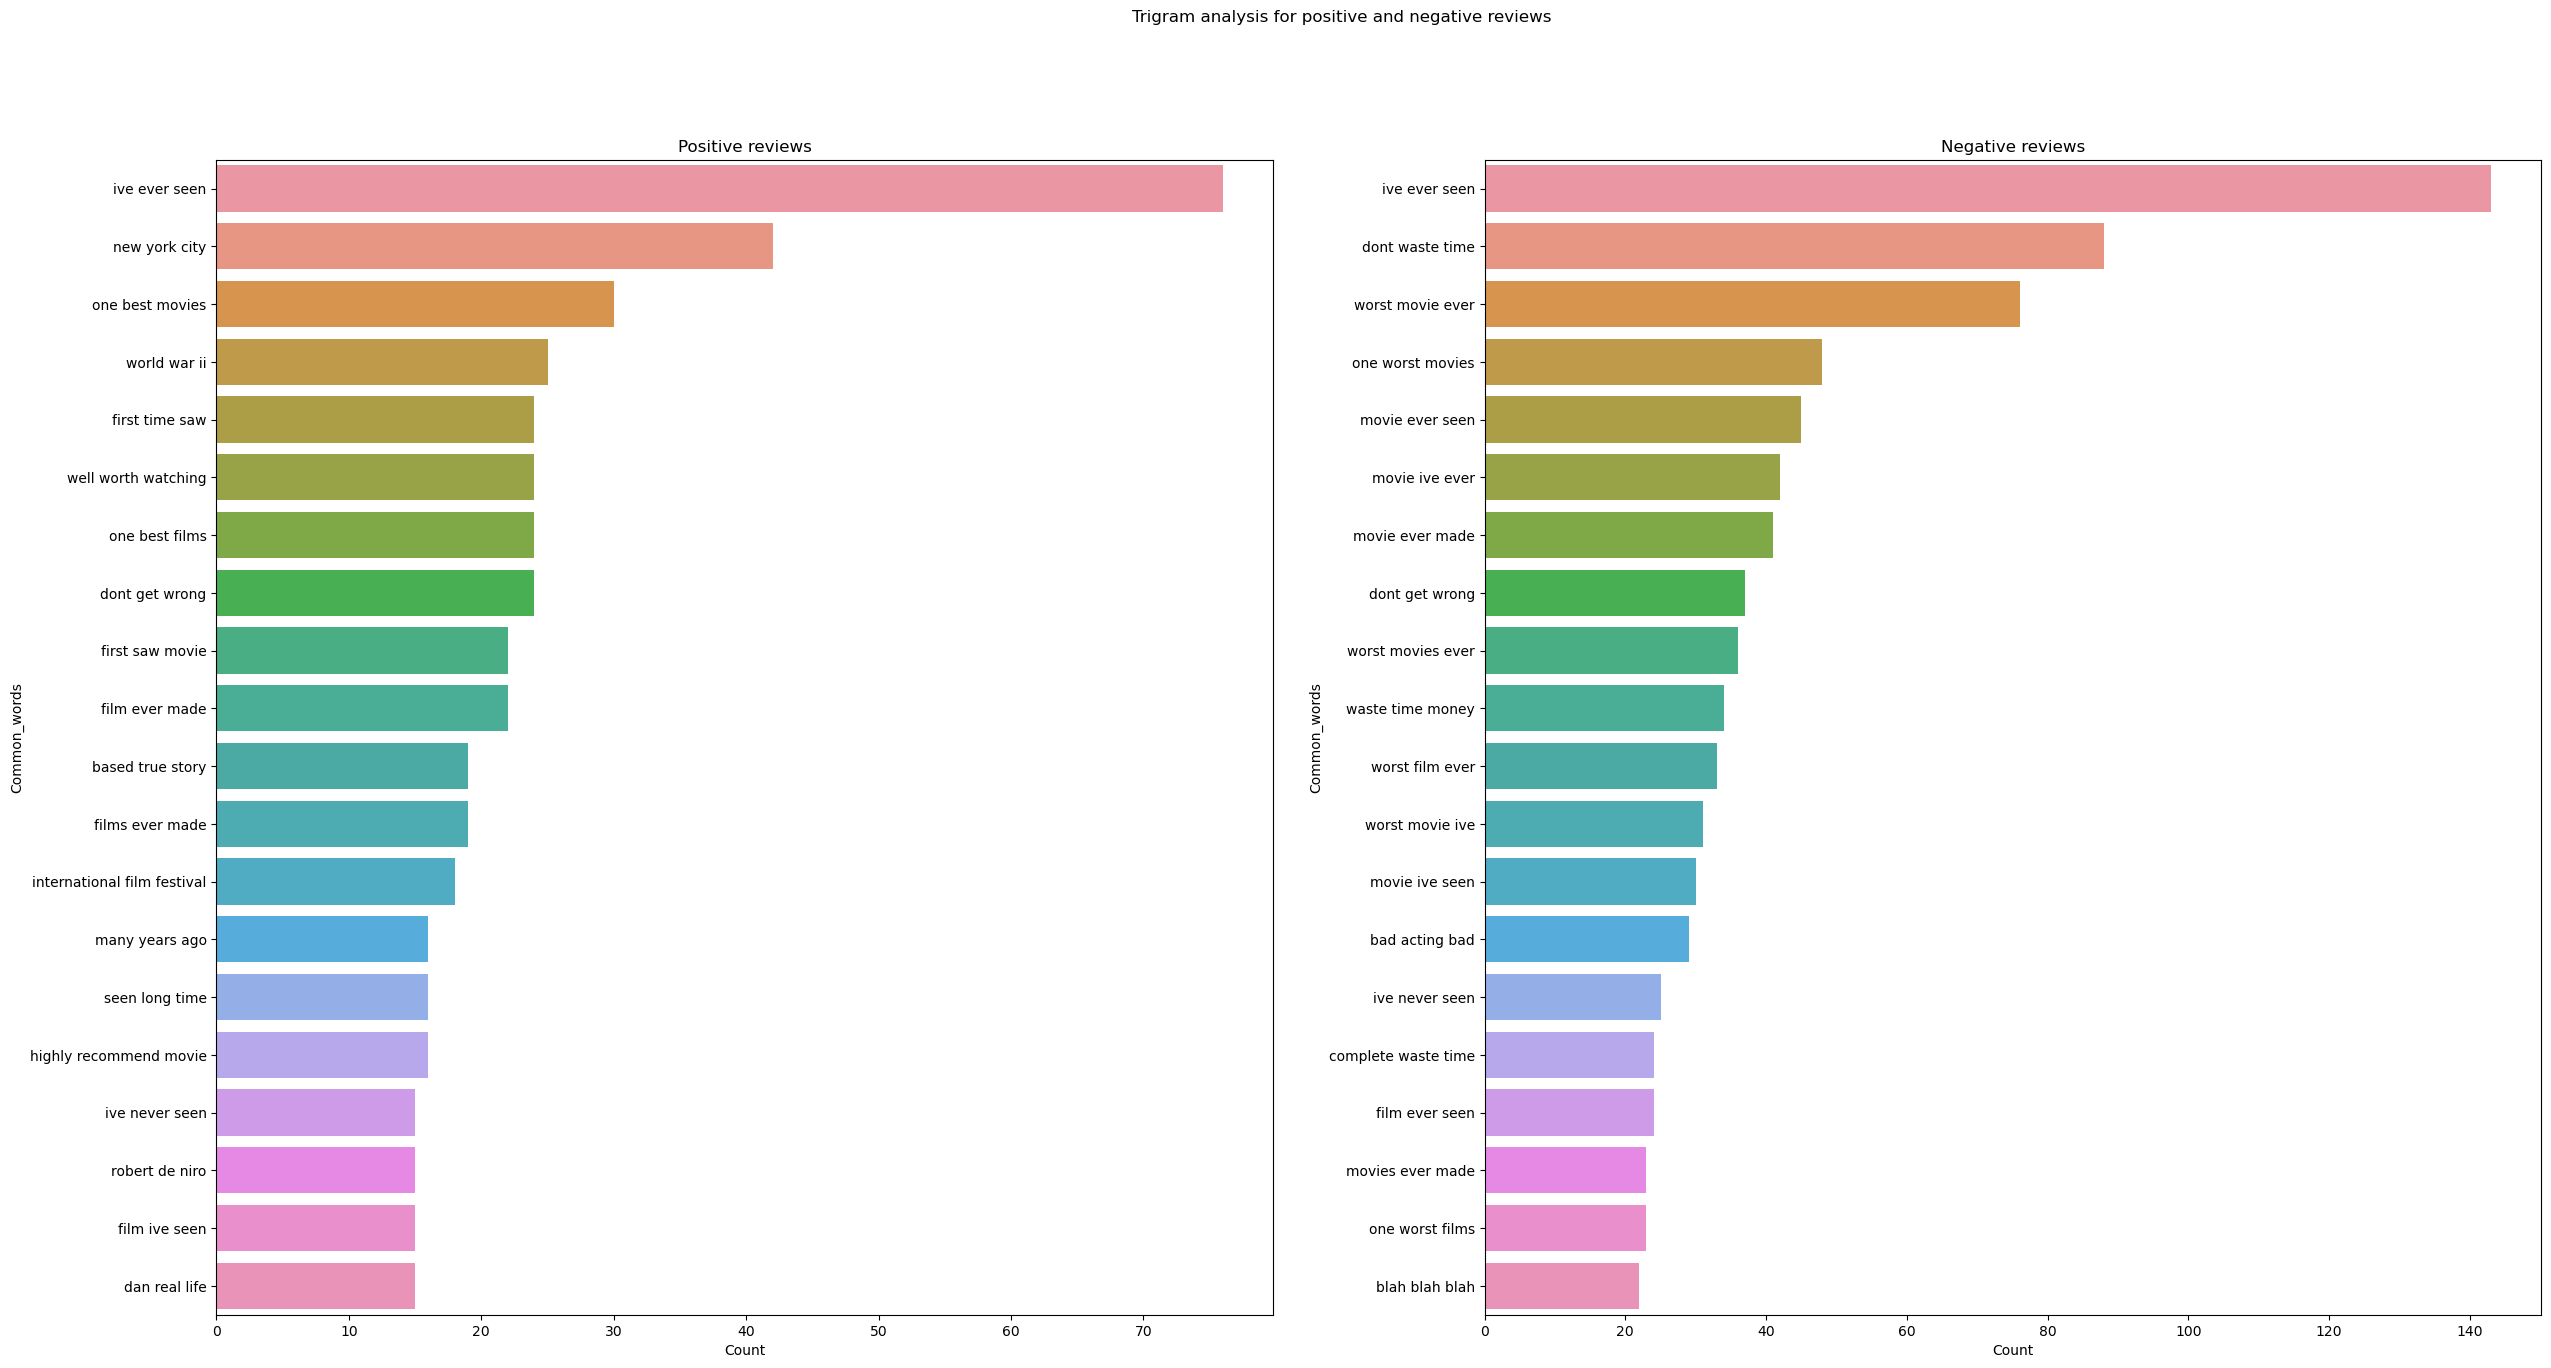

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [23]:
# Check if the stopwords, special characters, extra spaces has removed or not
# check if the data is in lowercase or not
df.review

0       background knowledge movie bought sounded cool...
1       huge jane austen fan ordered movie amazonuk co...
2       nothing say wow anyone actually somebody sneak...
3       like jane austin novels love pride prejudice s...
4       day age incredible special movie effects one s...
                              ...                        
9995    first saw movie back early90s first released r...
9996    nyc 2022 greenhouse effect vanished oceans gri...
9997    individuals familiar asian cinema whole aware ...
9998    kids aged 7 14 got huge kick film gave copy ki...
9999    love movie animation great pokmon movie cgi lo...
Name: review, Length: 10000, dtype: object

In [ ]:
df

First and last five reviews of the data 

# Label Encoding

In [24]:
#unique values of labels
label_encoder = LabelEncoder()
# Fit label encoder and transform the 'category' column
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

## Split the data 

In [25]:
#split target and features 
y = df['sentiment']
X = df.review

## Train-test split

In [26]:
# split the feature & target in 80% train & 20% test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000,), (2000,), (8000,), (2000,))

In [27]:
#Applying count vectorizer
vectorizer = CountVectorizer()

# fit and transform train test vectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [37]:
# check dtype and format
X_train_vec, X_test_vec

(<7992x62621 sparse matrix of type '<class 'numpy.int64'>'
 	with 800706 stored elements in Compressed Sparse Row format>,
 <1998x62621 sparse matrix of type '<class 'numpy.int64'>'
 	with 192412 stored elements in Compressed Sparse Row format>)

# Predictive Modeling

In [28]:
# Perform Latent Semantic Analysis (LSA) on the TF-IDF data
n_components = 100
lsa_model = TruncatedSVD(n_components=n_components)

### Multinomial Naive Bayes (Multinomial-NB)

In [29]:
#Applying Tf-Idf transformation and building a model
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Building a model using Naive Bayes(MultinomialNB)
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf,y_train)

MultinomialNB()

In [30]:
# Fit LSA model on the training TF-IDF data
X_train_lsa = lsa_model.fit_transform(X_train_tfidf)

# Transform the test TF-IDF data using the fitted LSA model
X_test_lsa = lsa_model.transform(X_test_tfidf)

### Logistic Regression 

In [31]:
# Initialize models
logistic_regression_model = LogisticRegression()

# Fit the models on the LSA-transformed training data
logistic_regression_model.fit(X_train_lsa, y_train)

# Make predictions on the LSA-transformed test data
y_pred_logreg = logistic_regression_model.predict(X_test_lsa)# Evaluate the models' performance

# calculate accuracy
acc_logreg = accuracy_score(y_test, y_pred_logreg)

# Print the accuracies
print("Accuracy - Logistic Regression: {:.2f}%".format(acc_logreg * 100))

Accuracy - Logistic Regression: 84.60%


### Random Forest (RF)

In [32]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_lsa, y_train)
y_pred_rf = random_forest_model.predict(X_test_lsa)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy - Random Forest: {:.2f}%".format(acc_rf * 100))


Accuracy - Random Forest: 81.15%


In [35]:
print("Accuracy - Logistic Regression: {:.2f}%".format(acc_logreg * 100))
print("Accuracy - Random Forest: {:.2f}%".format(acc_rf * 100))
print("Accuracy - Gradient Boosting Machines (GBM): {:.2f}%".format(acc_gbm * 100))


Accuracy - Logistic Regression: 84.60%
Accuracy - Random Forest: 81.15%
Accuracy - Gradient Boosting Machines (GBM): 83.00%


# Modelling 

### Multinomial Naive Bayes (Multinomial-NB)

In [52]:
#Building Naive Bayes(MultinomialNB) model
model=MultinomialNB()
model.fit(X_train_vec, y_train)

#Tuning model using GridSearchCV
params = {'alpha': [0.1, 1, 10]}
grid_search = GridSearchCV(model,params, cv=5)
grid_search.fit(X_train_vec, y_train)
best_model = grid_search.best_estimator_

#Evaluating model's performance
y_pred = best_model.predict(X_test_vec)
accuracy_nb = accuracy_score(y_test, y_pred)
#accuracy for Naive bayes 
print("Naive Bayes Model Performance:")
print("NB count vectorizer Accuracy:", accuracy_nb)

Naive Bayes Model Performance:
NB count vectorizer Accuracy: 0.481


In [59]:
# Import the required libraries
from sklearn.naive_bayes import MultinomialNB

# Create and fit the Multinomial Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)

# Make predictions and calculate accuracy
y_pred_nb = model_nb.predict(X_test_vec)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Model Accuracy:", accuracy_nb)

Multinomial Naive Bayes Model Accuracy: 0.4915


# Random Forest (RF)

In [56]:
#calling random forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)

#fitting rf
model.fit(X_train_vec, y_train)

#getting accuracy
y_pred = model.predict(X_test_vec)
accuracy_randomforest = accuracy_score(y_test, y_pred)
print("Rancom Forest Model Accuracy:", accuracy_randomforest)

Rancom Forest Model Accuracy: 0.5


In [63]:
#comparing models performance
print("Model Performance Comparison:")
print("Multinomial-NB Count Vectorizer Model Accuracy:", accuracy_nb)
print("Rancom Forest Model Accuracy:", acc_rf)


Model Performance Comparison:
Multinomial-NB Count Vectorizer Model Accuracy: 0.4915
Rancom Forest Model Accuracy: 0.8115


**Conclusion :** 

Multinomial-NB gives us the best accuracy of 85.28% out of all models 

### Overall Model comparisons 

Comparing accuracy of models with LSA & LDA and wthout LSA & LDA

In [68]:
print("Accuracy - Logistic Regression: {:.2f}%".format(acc_logreg * 100))
print("Accuracy - Random Forest: {:.2f}%".format(acc_rf * 100))
print("Accuracy - Gradient Boosting Machines (GBM): {:.2f}%".format(acc_gbm * 100))
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Random Forest Accuracy:", accuracy_rf)
print("Gradient Boosting Accuracy:", accuracy_gbm)
print("Multinomial-NB Count Vectorizer Model Accuracy:", accuracy_nb)
print("Rancom Forest Model Accuracy:", acc_rf)


Accuracy - Logistic Regression: 84.60%
Accuracy - Random Forest: 81.15%
Accuracy - Gradient Boosting Machines (GBM): 83.00%
Logistic Regression Accuracy: 0.5235
Random Forest Accuracy: 0.505
Gradient Boosting Accuracy: 0.521
Multinomial-NB Count Vectorizer Model Accuracy: 0.4915
Rancom Forest Model Accuracy: 0.8115


**Conclusion :**

The Multinomial Naive Bayes model with Count Vectorizer achieves an impressive accuracy of 85.28%, indicating the effectiveness of our sentiment analysis in determining the sentiment (positive or negative) of IMDB movie reviews.

The high accuracy reflects the robustness of our sentiment analysis model, demonstrating its ability to make accurate predictions on the sentiment of movie reviews within the IMDB dataset.